In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [2]:
dataset=pd.read_csv('loan_approval_dataset.csv')

In [3]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
dataset=dataset.dropna()

In [8]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
dataset=dataset.drop('Loan_ID',axis=1)

In [10]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
dataset['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


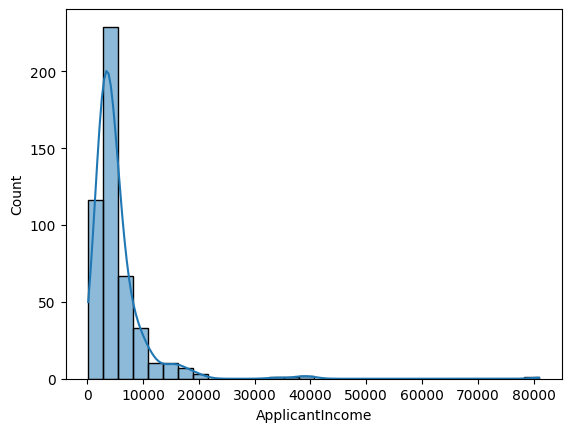

In [12]:
sns.histplot(x=dataset['ApplicantIncome'],bins=30,kde=True)
plt.show()

In [13]:
dataset['ApplicantIncome_log']=np.log1p(dataset['ApplicantIncome'])

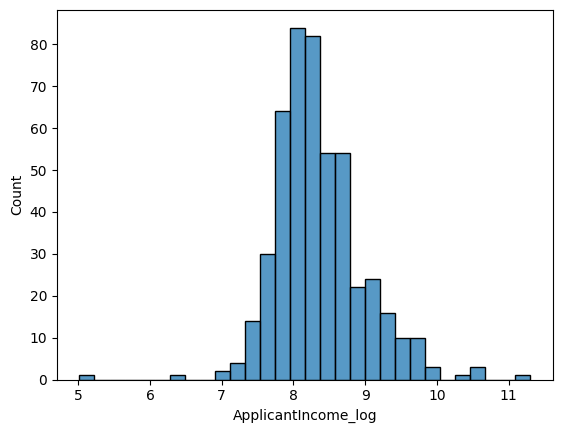

In [14]:
sns.histplot(x=dataset['ApplicantIncome_log'],kde=False,bins=30)
plt.show()

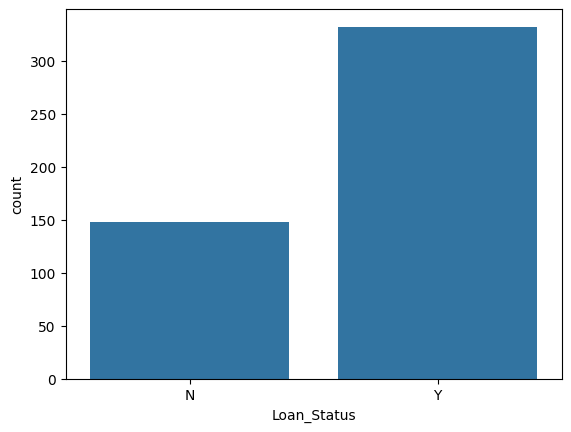

In [15]:
sns.countplot(x=dataset['Loan_Status'])
plt.show()

In [16]:
sc = StandardScaler()
ohe = OneHotEncoder(sparse_output=False)
preprocessor = ColumnTransformer([('scaler',sc,['ApplicantIncome_log','CoapplicantIncome','LoanAmount','Loan_Amount_Term']),('encoder',ohe,['Gender','Married','Education','Self_Employed','Property_Area'])])

In [17]:
le=LabelEncoder()
dataset['Loan_Status']=le.fit_transform(dataset['Loan_Status'])

In [18]:
pipeline_logistic=Pipeline([('model_logistic',LogisticRegression(random_state=42))])

In [19]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,8.430327
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,7.857094
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,8.699681
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,8.597482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,7.972811
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,8.320448
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8.996280
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,8.933796


In [20]:
x=dataset.drop('Loan_Status',axis=1)
y=dataset['Loan_Status']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train_processed = preprocessor.fit_transform(x_train)

In [23]:
x_test_processed=preprocessor.transform(x_test)

In [24]:
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train_processed,y_train)

In [25]:
x_train_res = pd.DataFrame(x_train_res, columns=preprocessor.get_feature_names_out())

In [26]:
y_train_res = pd.DataFrame(y_train_res, columns=['Loan_Status'])

In [27]:
x_test_processed=pd.DataFrame(x_test_processed,columns=preprocessor.get_feature_names_out())

In [28]:
x_train_res

,scaler__ApplicantIncome_log,scaler__CoapplicantIncome,scaler__LoanAmount,scaler__Loan_Amount_Term,encoder__Gender_Female,encoder__Gender_Male,encoder__Married_No,encoder__Married_Yes,encoder__Education_Graduate,encoder__Education_Not Graduate,encoder__Self_Employed_No,encoder__Self_Employed_Yes,encoder__Property_Area_Rural,encoder__Property_Area_Semiurban,encoder__Property_Area_Urban
0,-0.289385,-0.590022,-0.809935,-2.397575,0.0,1.0,0.0,1.0,0.000000,1.000000,1.0,0.0,1.000000,0.000000,0.000000
1,-0.039159,-0.590022,-0.370210,0.280345,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000
2,-0.092734,-0.080986,0.172980,0.280345,0.0,1.0,0.0,1.0,0.000000,1.000000,1.0,0.0,1.000000,0.000000,0.000000
3,-0.706130,-0.169012,-0.603005,0.280345,0.0,1.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.000000,1.000000,0.000000
4,0.959291,-0.590022,-0.202079,-2.397575,0.0,1.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,-0.735244,0.084096,-0.371571,-2.397575,0.0,1.0,0.0,1.0,0.000000,1.000000,1.0,0.0,0.000000,0.000000,1.000000
524,-0.459187,0.198654,-0.277252,-2.397575,0.0,1.0,1.0,0.0,0.254164,0.745836,1.0,0.0,0.000000,0.000000,1.000000
525,2.668463,-0.590022,1.497450,0.280345,0.0,1.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.000000,0.704709,0.295291
526,-1.407063,-0.150105,-0.763187,0.280345,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0,0.322551,0.677449,0.000000


In [29]:
y_train_res

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
523,0
524,0
525,0
526,0


In [30]:
x_test_processed

,scaler__ApplicantIncome_log,scaler__CoapplicantIncome,scaler__LoanAmount,scaler__Loan_Amount_Term,encoder__Gender_Female,encoder__Gender_Male,encoder__Married_No,encoder__Married_Yes,encoder__Education_Graduate,encoder__Education_Not Graduate,encoder__Self_Employed_No,encoder__Self_Employed_Yes,encoder__Property_Area_Rural,encoder__Property_Area_Semiurban,encoder__Property_Area_Urban
0,-0.405653,0.066565,-0.809935,0.280345,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.749971,-0.590022,-0.176213,0.280345,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-0.294797,1.003105,1.285225,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.543758,0.011008,-0.564206,2.065625,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.400816,0.144129,0.056582,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-0.116780,-0.301412,-0.409009,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
92,-1.175579,0.465208,-0.396076,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
93,0.467681,-0.076297,-0.564206,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
94,-0.299321,0.011369,-0.383143,0.280345,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
params_logistic={'model_logistic__max_iter':[10000,2000,15000],'model_logistic__solver':['lbfgs','saga','liblinear'],'model_logistic__C':[1,2,0.1,0.01]}
grid_logistic=GridSearchCV(pipeline_logistic,params_logistic,cv=5,scoring='accuracy')

In [32]:
grid_logistic.fit(x_train_res,y_train_res.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_logistic',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model_logistic__C': [1, 2, 0.1, 0.01],
                         'model_logistic__max_iter': [10000, 2000, 15000],
                         'model_logistic__solver': ['lbfgs', 'saga',
                                                    'liblinear']},
             scoring='accuracy')

In [33]:
y_pred_logistic=grid_logistic.predict(x_test_processed)

In [34]:
accuracy_score(y_test,y_pred_logistic)

0.5833333333333334

In [35]:
print(confusion_matrix(y_test,y_pred_logistic))

[[14 14]
 [26 42]]


In [36]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.35      0.50      0.41        28
           1       0.75      0.62      0.68        68

    accuracy                           0.58        96
   macro avg       0.55      0.56      0.54        96
weighted avg       0.63      0.58      0.60        96



In [37]:
y_pred_prob_logistic=grid_logistic.predict_proba(x_test_processed)[:,1]

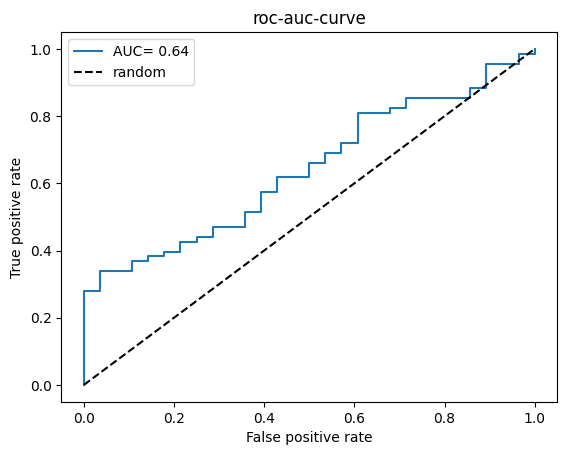

In [38]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_logistic)
auc_sco=roc_auc_score(y_test,y_pred_prob_logistic)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

In [39]:
pipeline_rf=Pipeline([('model_rf',RandomForestClassifier(random_state=42))])

In [40]:
params_rf={'model_rf__n_estimators':[100,1000],'model_rf__max_depth':[6,7,None],'model_rf__min_samples_split':[8,10,15],'model_rf__min_samples_leaf':[3,5,10]}

In [41]:
grid_rf=GridSearchCV(pipeline_rf,params_rf,cv=5,scoring='accuracy')

In [42]:
grid_rf.fit(x_train_res,y_train_res.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model_rf__max_depth': [6, 7, None],
                         'model_rf__min_samples_leaf': [3, 5, 10],
                         'model_rf__min_samples_split': [8, 10, 15],
                         'model_rf__n_estimators': [100, 1000]},
             scoring='accuracy')

In [43]:
y_pred_rf=grid_rf.predict(x_test_processed)

In [44]:
accuracy_score(y_test,y_pred_rf)

0.6875

In [45]:
print(confusion_matrix(y_test,y_pred_rf))

[[15 13]
 [17 51]]


In [46]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50        28
           1       0.80      0.75      0.77        68

    accuracy                           0.69        96
   macro avg       0.63      0.64      0.64        96
weighted avg       0.70      0.69      0.69        96



In [47]:
y_pred_prob_rf=grid_rf.predict_proba(x_test_processed)[:,1]

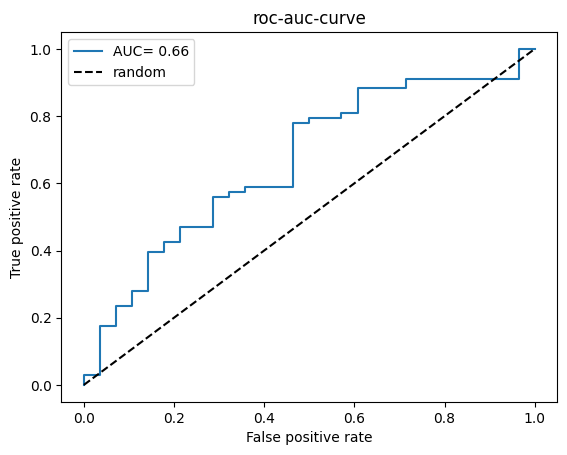

In [48]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_rf)
auc_sco=roc_auc_score(y_test,y_pred_prob_rf)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

In [49]:
pipeline_dt=Pipeline([('model_dt',DecisionTreeClassifier(random_state=42))])

In [50]:
params_dt={'model_dt__max_depth':[6,7,None],'model_dt__min_samples_split':[2,5,8,10,15],'model_dt__min_samples_leaf':[2,3,5,10]}

In [51]:
grid_dt=GridSearchCV(pipeline_dt,params_dt,cv=5,scoring='accuracy')

In [52]:
grid_dt.fit(x_train_res,y_train_res.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model_dt__max_depth': [6, 7, None],
                         'model_dt__min_samples_leaf': [2, 3, 5, 10],
                         'model_dt__min_samples_split': [2, 5, 8, 10, 15]},
             scoring='accuracy')

In [53]:
y_pred_dt=grid_dt.predict(x_test_processed)

In [54]:
accuracy_score(y_test,y_pred_dt)

0.5833333333333334

In [55]:
print(confusion_matrix(y_test,y_pred_dt))

[[13 15]
 [25 43]]


In [56]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.34      0.46      0.39        28
           1       0.74      0.63      0.68        68

    accuracy                           0.58        96
   macro avg       0.54      0.55      0.54        96
weighted avg       0.62      0.58      0.60        96



In [57]:
y_pred_prob_dt=grid_dt.predict_proba(x_test_processed)[:,1]

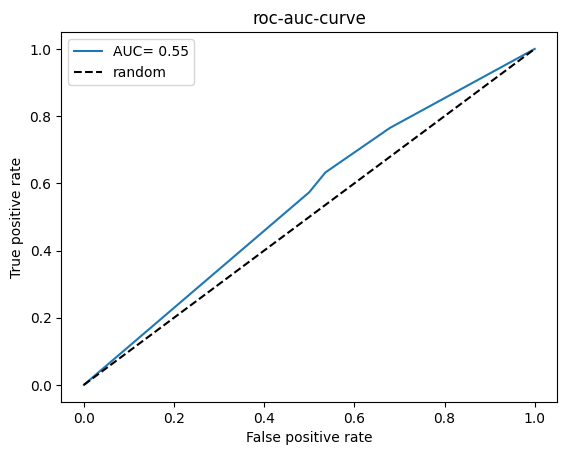

In [58]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_dt)
auc_sco=roc_auc_score(y_test,y_pred_prob_dt)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

In [59]:
pipeline_knn=Pipeline([('model_knn',KNeighborsClassifier())])

In [60]:
params_knn={'model_knn__n_neighbors':[2,3,5,4,7],'model_knn__weights':['distance','uniform'],'model_knn__metric':['euclidean','manhattan']}

In [61]:
grid_knn=GridSearchCV(pipeline_knn,params_knn,cv=5,scoring='accuracy')

In [62]:
grid_knn.fit(x_train_res,y_train_res.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_knn', KNeighborsClassifier())]),
             param_grid={'model_knn__metric': ['euclidean', 'manhattan'],
                         'model_knn__n_neighbors': [2, 3, 5, 4, 7],
                         'model_knn__weights': ['distance', 'uniform']},
             scoring='accuracy')

In [63]:
y_pred_knn=grid_knn.predict(x_test_processed)

In [64]:
accuracy_score(y_test,y_pred_knn)

0.6666666666666666

In [65]:
print(confusion_matrix(y_test,y_pred_knn))

[[12 16]
 [16 52]]


In [66]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        28
           1       0.76      0.76      0.76        68

    accuracy                           0.67        96
   macro avg       0.60      0.60      0.60        96
weighted avg       0.67      0.67      0.67        96



In [67]:
y_pred_prob_knn=grid_knn.predict_proba(x_test_processed)[:,1]

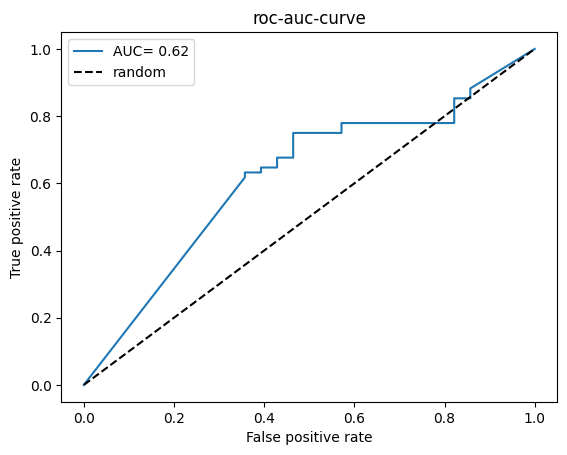

In [68]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_knn)
auc_sco=roc_auc_score(y_test,y_pred_prob_knn)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

0.625
[[14 14]
 [22 46]]
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        28
           1       0.77      0.68      0.72        68

    accuracy                           0.62        96
   macro avg       0.58      0.59      0.58        96
weighted avg       0.66      0.62      0.64        96



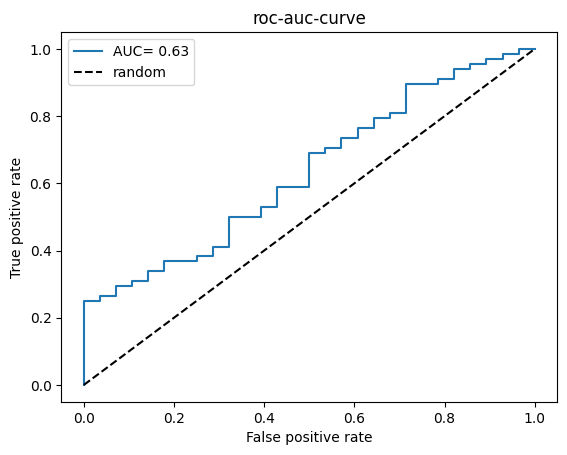

In [69]:
pipeline_gnb=Pipeline([('model_gnb',GaussianNB())])

params_gnb={'model_gnb__var_smoothing':[1e-9,1e-8,1e-15,1e-18],'model_gnb__priors':[None]}

grid_gnb=GridSearchCV(pipeline_gnb,params_gnb,cv=5,scoring='accuracy')

grid_gnb.fit(x_train_res,y_train_res.values.ravel())

y_pred_gnb=grid_gnb.predict(x_test_processed)

print(accuracy_score(y_test,y_pred_gnb))

print(confusion_matrix(y_test,y_pred_gnb))

print(classification_report(y_test,y_pred_gnb))

y_pred_prob_gnb=grid_gnb.predict_proba(x_test_processed)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_gnb)
auc_sco=roc_auc_score(y_test,y_pred_prob_gnb)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()



0.59375
[[15 13]
 [26 42]]
              precision    recall  f1-score   support

           0       0.37      0.54      0.43        28
           1       0.76      0.62      0.68        68

    accuracy                           0.59        96
   macro avg       0.56      0.58      0.56        96
weighted avg       0.65      0.59      0.61        96



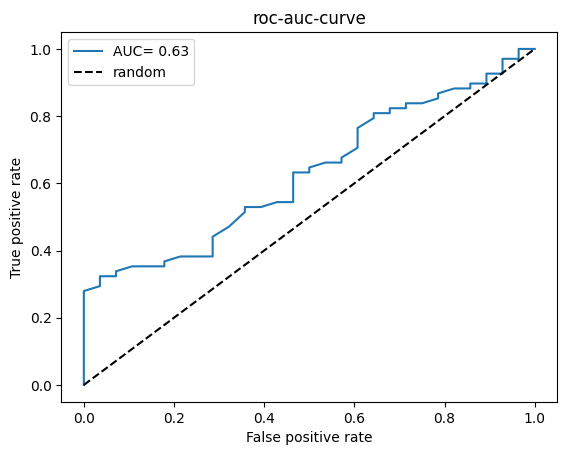

In [70]:
pipeline_bnb=Pipeline([('model_bnb',BernoulliNB())])

params_bnb={'model_bnb__alpha':[1,2,0.1,0.01,10,15],'model_bnb__fit_prior':[True,False],'model_bnb__binarize':[1,2,0]}

grid_bnb=GridSearchCV(pipeline_bnb,params_bnb,cv=5,scoring='accuracy')

grid_bnb.fit(x_train_res,y_train_res.values.ravel())

y_pred_bnb=grid_bnb.predict(x_test_processed)

print(accuracy_score(y_test,y_pred_bnb))

print(confusion_matrix(y_test,y_pred_bnb))

print(classification_report(y_test,y_pred_bnb))

y_pred_prob_bnb=grid_bnb.predict_proba(x_test_processed)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_bnb)
auc_sco=roc_auc_score(y_test,y_pred_prob_bnb)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()


0.6145833333333334
[[ 7 21]
 [16 52]]
              precision    recall  f1-score   support

           0       0.30      0.25      0.27        28
           1       0.71      0.76      0.74        68

    accuracy                           0.61        96
   macro avg       0.51      0.51      0.51        96
weighted avg       0.59      0.61      0.60        96



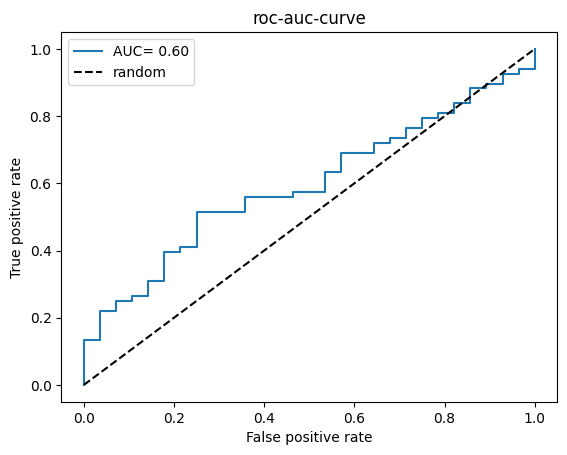

In [71]:
pipeline_svm=Pipeline([('model_svm',SVC())])

params_svm={'model_svm__C':[1,2,0.1,0.01],'model_svm__probability':[True,False],'model_svm__kernel':['rbf','linear','sigmoid','poly'],'model_svm__gamma':[1,0.1,0.01,2]}

grid_svm=GridSearchCV(pipeline_svm,params_svm,cv=5,scoring='accuracy')

grid_svm.fit(x_train_res,y_train_res.values.ravel())

y_pred_svm=grid_svm.predict(x_test_processed)

print(accuracy_score(y_test,y_pred_svm))

print(confusion_matrix(y_test,y_pred_svm))

print(classification_report(y_test,y_pred_svm))

y_pred_prob_svm=grid_svm.predict_proba(x_test_processed)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_svm)
auc_sco=roc_auc_score(y_test,y_pred_prob_svm)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

In [72]:
!pip install xgboost

In [83]:
from xgboost import XGBClassifier

0.6458333333333334
[[11 17]
 [17 51]]
              precision    recall  f1-score   support

           0       0.39      0.39      0.39        28
           1       0.75      0.75      0.75        68

    accuracy                           0.65        96
   macro avg       0.57      0.57      0.57        96
weighted avg       0.65      0.65      0.65        96



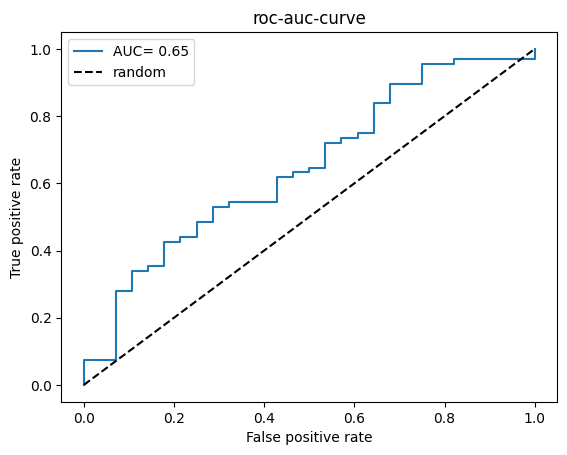

In [85]:
pipeline_xgb=Pipeline([('model_xgb',XGBClassifier())])

params_xgb={'model_xgb__max_depth':[9,6,7],'model_xgb__subsample':[0.7,0.2,0.1],'model_xgb__colsample_bytree':[0.5,0.7,0.8],'model_xgb__gamma':[1,0.1,0.01,2.0],'model_xgb__n_estimators':[100,500],'model_xgb__learning_rate':[0.01,0.1,1.0]}

grid_xgb=GridSearchCV(pipeline_xgb,params_xgb,cv=5,scoring='accuracy')

grid_xgb.fit(x_train_res,y_train_res.values.ravel())

y_pred_xgb=grid_xgb.predict(x_test_processed)

print(accuracy_score(y_test,y_pred_xgb))

print(confusion_matrix(y_test,y_pred_xgb))

print(classification_report(y_test,y_pred_xgb))

y_pred_prob_xgb=grid_xgb.predict_proba(x_test_processed)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob_xgb)
auc_sco=roc_auc_score(y_test,y_pred_prob_xgb)
plt.plot(fpr,tpr,label=f"AUC= {auc_sco:.2f}")
plt.plot([0,1],[0,1],'k--',label="random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("roc-auc-curve")
plt.legend()
plt.show()

In [89]:
results = {'Logistic Regression': 0.5833,'Random Forest': 0.6875,'Gaussian NB': 0.625,'Bernoulli NB': 0.59375,'SVC': 0.6145,'XGBoost': 0.6458,'KNN':0.6666,'Decision tree':0.583}

In [92]:
comparision=pd.DataFrame(list(results.items()),columns=['Models',"Accuracies"])

In [93]:
comparision

,Models,Accuracies
0,Logistic Regression,0.58330
1,Random Forest,0.68750
2,Gaussian NB,0.62500
3,Bernoulli NB,0.59375
4,SVC,0.61450
5,XGBoost,0.64580
6,KNN,0.66660
7,Decision tree,0.58300


In [95]:
comparision.sort_values(by="Accuracies",ascending=False)

,Models,Accuracies
1,Random Forest,0.68750
6,KNN,0.66660
5,XGBoost,0.64580
2,Gaussian NB,0.62500
4,SVC,0.61450
3,Bernoulli NB,0.59375
0,Logistic Regression,0.58330
7,Decision tree,0.58300
